In [1]:
pwd

'C:\\Users\\91948\\Documents\\OPEN\\ATTENDANCE PROJECT'

In [2]:
import matplotlib .pyplot as plt
%matplotlib inline
import cv2
import numpy as np
import tensorflow as tf
import cvzone
import os
from cvzone.HandTrackingModule import HandDetector
from time import sleep
from pynput.keyboard import Controller
import datetime
from datetime import datetime
import pandas as pd

In [3]:
#detecting face in video

In [4]:
face=cv2.CascadeClassifier('lbpcascade_frontalface.xml')


In [5]:
def detect_face(image):
    face_image=image.copy()
    face_rectangle=face.detectMultiScale(face_image)
    for (x,y,w,h) in face_rectangle:
        cv2.rectangle(face_image,(x,y),(x+w,y+h),(255,255,255),2)
    return face_image


In [6]:
#taking the frame and finding the face in the frame
def crop_face(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face.detectMultiScale(gray);
    if (len(faces) == 0):
        return None, None
    (x, y, w, h) = faces[0]
    return gray[y:y+w, x:x+h], faces[0]

In [7]:
detector = HandDetector(detectionCon=0.8)
keyboard_keys = [["PRESS"]]
final_text = ""

In [8]:
def draw(img, buttonList):
    for button in buttonList:
        x, y = button.pos
        w, h = button.size
        cvzone.cornerRect(img, (button.pos[0], button.pos[1],
                                                   button.size[0],button.size[0]), 20 ,rt=0)
        cv2.rectangle(img, button.pos, (int(x + w), int(y + h)), (255, 144, 30), cv2.FILLED)
        cv2.putText(img, button.text, (x + 20, y + 65),
                    cv2.FONT_HERSHEY_PLAIN, 4, (0, 0, 0), 4)
    return img


In [9]:
class Button():
    def __init__(self, pos, text, size=[250, 250]):
        self.pos = pos
        self.size = size
        self.text = text

In [10]:
buttonList = []
# mybutton = Button([100, 100], "Q")
for x, key in enumerate(keyboard_keys[0]):
        button=Button([25, 50], key)
        buttonList.append(button)

In [11]:
input_images=['im1.jpg','im2.jpg','im3.jpg','im4.jpg','im5.jpg','im6.jpg','im7.jpg','im8.jpg','im9.jpg','im10.jpg']
names=['','SHARON VARGHESE','VIJAYATITHYAN S']


In [12]:
filename='attendance.txt'

In [13]:
def capturing(dt):
    time = dt.strftime('%I:%M:%S:%p')
    date = dt.strftime('%d-%B-%Y')
    with open(filename,'a') as f:
        f.write(" "+date+" "+time+'\n')                    

In [14]:
#names=["","Cristiano Ronaldo","Messi"]

In [15]:
#os.listdir
#os.walk
#os.path.join

In [16]:
#names_list=os.listdir(r'Celebrity Faces Dataset')
#print(names_list)

In [17]:
def prepare_training_data(data_folder_path):
    
    #------STEP-1--------
    #get the directories (one directory for each subject) in data folder
    dirs = os.listdir(data_folder_path)
    #dirs=['.ipynb_checkpoints', 's1', 's2']
    #list to hold all subject faces
    faces = []
    #list to hold labels for all subjects
    labels = []
    
    #let's go through each directory and read images within it
    for dir_name in dirs:
        
        #our subject directories start with letter 's' so
        #ignore any non-relevant directories if any
        if not dir_name.startswith("s"):
            continue;
            
        #------STEP-2--------
        #extract label number of subject from dir_name
        #format of dir name = slabel
        #, so removing letter 's' from dir_name will give us label
        label = int(dir_name.replace("s", ""))
        
        #build path of directory containin images for current subject subject
        #sample subject_dir_path = "training-data/s1"
        subject_dir_path = data_folder_path + "/" + dir_name
        
        #get the images names that are inside the given subject directory
        subject_images_names = os.listdir(subject_dir_path)
        
        
        #------STEP-3--------
        #go through each image name, read image, 
        #detect face and add face to list of faces
        for image_name in subject_images_names:
            
            #ignore system files like .DS_Store
            if image_name.startswith("."):
                continue;
            
            #build image path
            #sample image path = training-data/s1/1.pgm
            image_path = subject_dir_path + "/" + image_name

            #read image
            
            image = cv2.imread(image_path)
            #image = load_and_prep_image(image_path)
            
            #display an image window to show the image 
            cv2.imshow("Training on image...", image)
            cv2.waitKey(100)
            
            #detect face
            face, rect = crop_face(image)
            
            #------STEP-4--------
            #for the purpose of this tutorial
            #we will ignore faces that are not detected
            if face is not None:
                #add face to list of faces
                faces.append(face)
                #add label for this face
                labels.append(label)
            
    cv2.destroyAllWindows()
    cv2.waitKey(1)
    cv2.destroyAllWindows()
    
    return faces, labels

In [18]:
print("Preparing data...")
faces, labels = prepare_training_data("TRAINING2")
print("Data prepared")

#print total faces and labels
print("Total faces: ", len(faces))
print("Total labels: ", len(labels))

Preparing data...
Data prepared
Total faces:  129
Total labels:  129


In [19]:
face_recognizer =cv2.face.LBPHFaceRecognizer_create()




In [20]:
face_recognizer.train(faces, np.array(labels))

In [21]:
def draw_rectangle(img, rect):
    (x, y, w, h) = rect
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
    
#function to draw text on give image starting from
#passed (x, y) coordinates. 
def draw_text(img, text, x, y):
    cv2.putText(img, text, (x, y), cv2.FONT_HERSHEY_PLAIN, 1.5, (0, 255, 0), 2)

In [22]:
def predict(frame):
    #make a copy of the image as we don't want to chang original image
    img = frame.copy()
    #detect face from the image
    face, rect = crop_face(img)

    #predict the image using our face recognizer 
    label= face_recognizer.predict(face)
    
    #get name of respective label returned by face recognizer
    label_text = names[label[0]]
    print(label[0])
    #draw a rectangle around face detected
    draw_rectangle(img, rect)
    #draw name of predicted person
    draw_text(img, label_text, rect[0], rect[1]-5)
    
    
    return img,label_text

In [23]:
cap = cv2.VideoCapture(0, cv2.CAP_DSHOW)
cap.set(3, 1280)
cap.set(4, 720)
detector = HandDetector(detectionCon=0.8, maxHands=2)
j=0
while True:
    success, img = cap.read()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # Find the hand and its landmarks
    hands, img = detector.findHands(img)  # with draw
        # hands = detector.findHands(img, draw=False)  # without draw
    img = draw(img, buttonList)
            # Hand 1
    for i in hands:    
            hand1 =i
            lmList = hand1["lmList"]  # List of 21 Landmark points
            bbox= hand1["bbox"]  # Bounding box info x,y,w,h
            centerPoint= hand1['center']  # center of the hand cx,cy
            handType= hand1["type"]  # Handtype Left or Right    
            if lmList:
                for button in buttonList:
                        x, y = button.pos
                        w, h = button.size
                        if x < lmList[8][0]<x+w and y < lmList[8][1] < y+h:
                                cv2.rectangle(img, button.pos, (x + w, y + h),(0, 255, 255), cv2.FILLED)
                                print(button.text)
                                cv2.putText(img, button.text, (x + 20, y + 65),
                                cv2.FONT_HERSHEY_PLAIN, 4, (0, 0, 0), 4)
                                l, _, _ = detector.findDistance(lmList[8][0:2],lmList[12][0:2], img)
                                print(l)
                                text=button.text    
                                if l < 30:
                                    if j<10:
                                            cv2.imwrite(input_images[j],img)
                                            cv2.rectangle(img, button.pos, (x + w, y + h),(0, 255, 0), cv2.FILLED)                                          
                                            cv2.putText(img, text, (x + 20, y + 65),cv2.FONT_HERSHEY_PLAIN, 4, (0, 0, 0), 4)
                                            sleep(0.15)
                                            if cv2.waitKey(1) & 0xFF==ord('a'):
                                                            j+=1
                                                            string='CLICKED'
                                                            cv2.putText(img,string,(500,500),cv2.FONT_HERSHEY_PLAIN, 4, (0,0 ,255), 4)
                                                            #adding date to attendnce sheet
                                                            now= datetime.now()
                                                            capturing(now)
                                                            break
            break
            cv2.rectangle(img, (25,350), (700, 450),(255, 255, 255), cv2.FILLED)
            
                
                
    cv2.imshow('frame',img)
    if cv2.waitKey(1) & 0xFF==ord('q'):
        break
cap.release()

cv2.destroyAllWindows()

PRESS
91.98369420718001
PRESS
85.72630868059116
PRESS
87.28115489611719
PRESS
92.35799911215054
PRESS
88.76936408468859
PRESS
91.3892772703669
PRESS
91.92388155425118
PRESS
91.0
PRESS
91.92388155425118
PRESS
91.54780172128659
PRESS
89.88882021697691
PRESS
89.88882021697691
PRESS
93.98404119849283
PRESS
102.18121158021177
PRESS
104.40306508910551
PRESS
103.46496991735899
PRESS
100.65783625729297
PRESS
98.43271813782245
PRESS
99.92497185388646
PRESS
95.0789145920377
PRESS
55.44366510251645
PRESS
65.0
PRESS
74.30343195303969
PRESS
81.15417426109391
PRESS
84.581321815162
PRESS
84.09518416651456
PRESS
81.8413098624405
PRESS
85.0
PRESS
83.6301381082203
PRESS
86.33075929238663
PRESS
87.66413177577246
PRESS
89.05054744357274
PRESS
89.05054744357274
PRESS
91.78779875342909
PRESS
92.13576938409969
PRESS
93.02150289046077
PRESS
94.847245611035
PRESS
93.94147114027967
PRESS
94.37160589923221
PRESS
93.94147114027967
PRESS
93.94147114027967
PRESS
93.03762679690405
PRESS
94.42986815621421
PRESS
93.52

PRESS
85.0235261559999
PRESS
61.00819617067858
PRESS
10.44030650891055
PRESS
38.63935817272331
PRESS
73.02739212103907
PRESS
64.1248781675256
PRESS
24.331050121192874
PRESS
65.0
PRESS
14.0356688476182
PRESS
103.48429832588131
PRESS
14.0356688476182
PRESS
15.0
PRESS
33.52610922848042
PRESS
45.541190146942796
PRESS
58.189346103904626
PRESS
59.464274989274024
PRESS
57.24508712544685
PRESS
52.810983706043565
PRESS
43.08131845707604
PRESS
25.495097567963924
PRESS
24.596747752497688
PRESS
24.186773244895647
PRESS
23.259406699226012
PRESS
23.706539182259394
PRESS
22.847319317591726
PRESS
25.079872407968903
PRESS
23.706539182259394
PRESS
25.495097567963924
PRESS
62.03224967708329
PRESS
68.41052550594827
PRESS
71.84010022264724
PRESS
72.53275122315436
PRESS
67.89698078707183
PRESS
65.49045732013177
PRESS
63.63961030678928
PRESS
60.82762530298219
PRESS
58.05170109479997
PRESS
52.611785751863614
PRESS
50.21951811795887
PRESS
53.150729063673246
PRESS
50.28916384272063
PRESS
42.44997055358225
PRESS

1


Text(0.5, 1.0, 'SHARON VARGHESE')

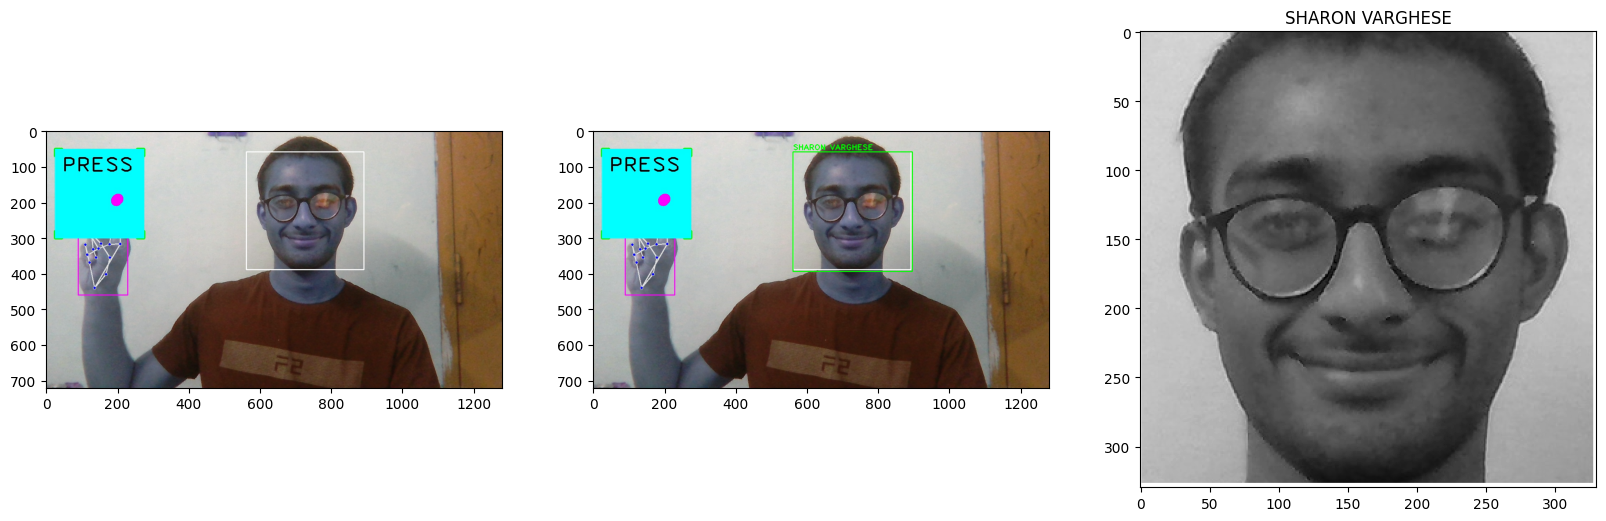

In [24]:
plt.figure(figsize=(20,20))
img=cv2.imread(input_images[4])
detected_face=detect_face(img)
plt.subplot(1,3,1)
plt.imshow(detected_face,cmap='gray')
predicted_img2,name = predict(detected_face)
plt.subplot(1,3,2)
plt.imshow(predicted_img2,cmap='gray')
cropped_image,coordinates=crop_face(predicted_img2)
plt.subplot(1,3,3)
plt.imshow(cropped_image,cmap='gray')
plt.title(name)


In [25]:
df=pd.read_csv('attendance.txt',sep=" ",names=['nil','date','time'])
df.drop('nil',axis=1,inplace=True)

2
1
2
1
1
1
1
2
1
1


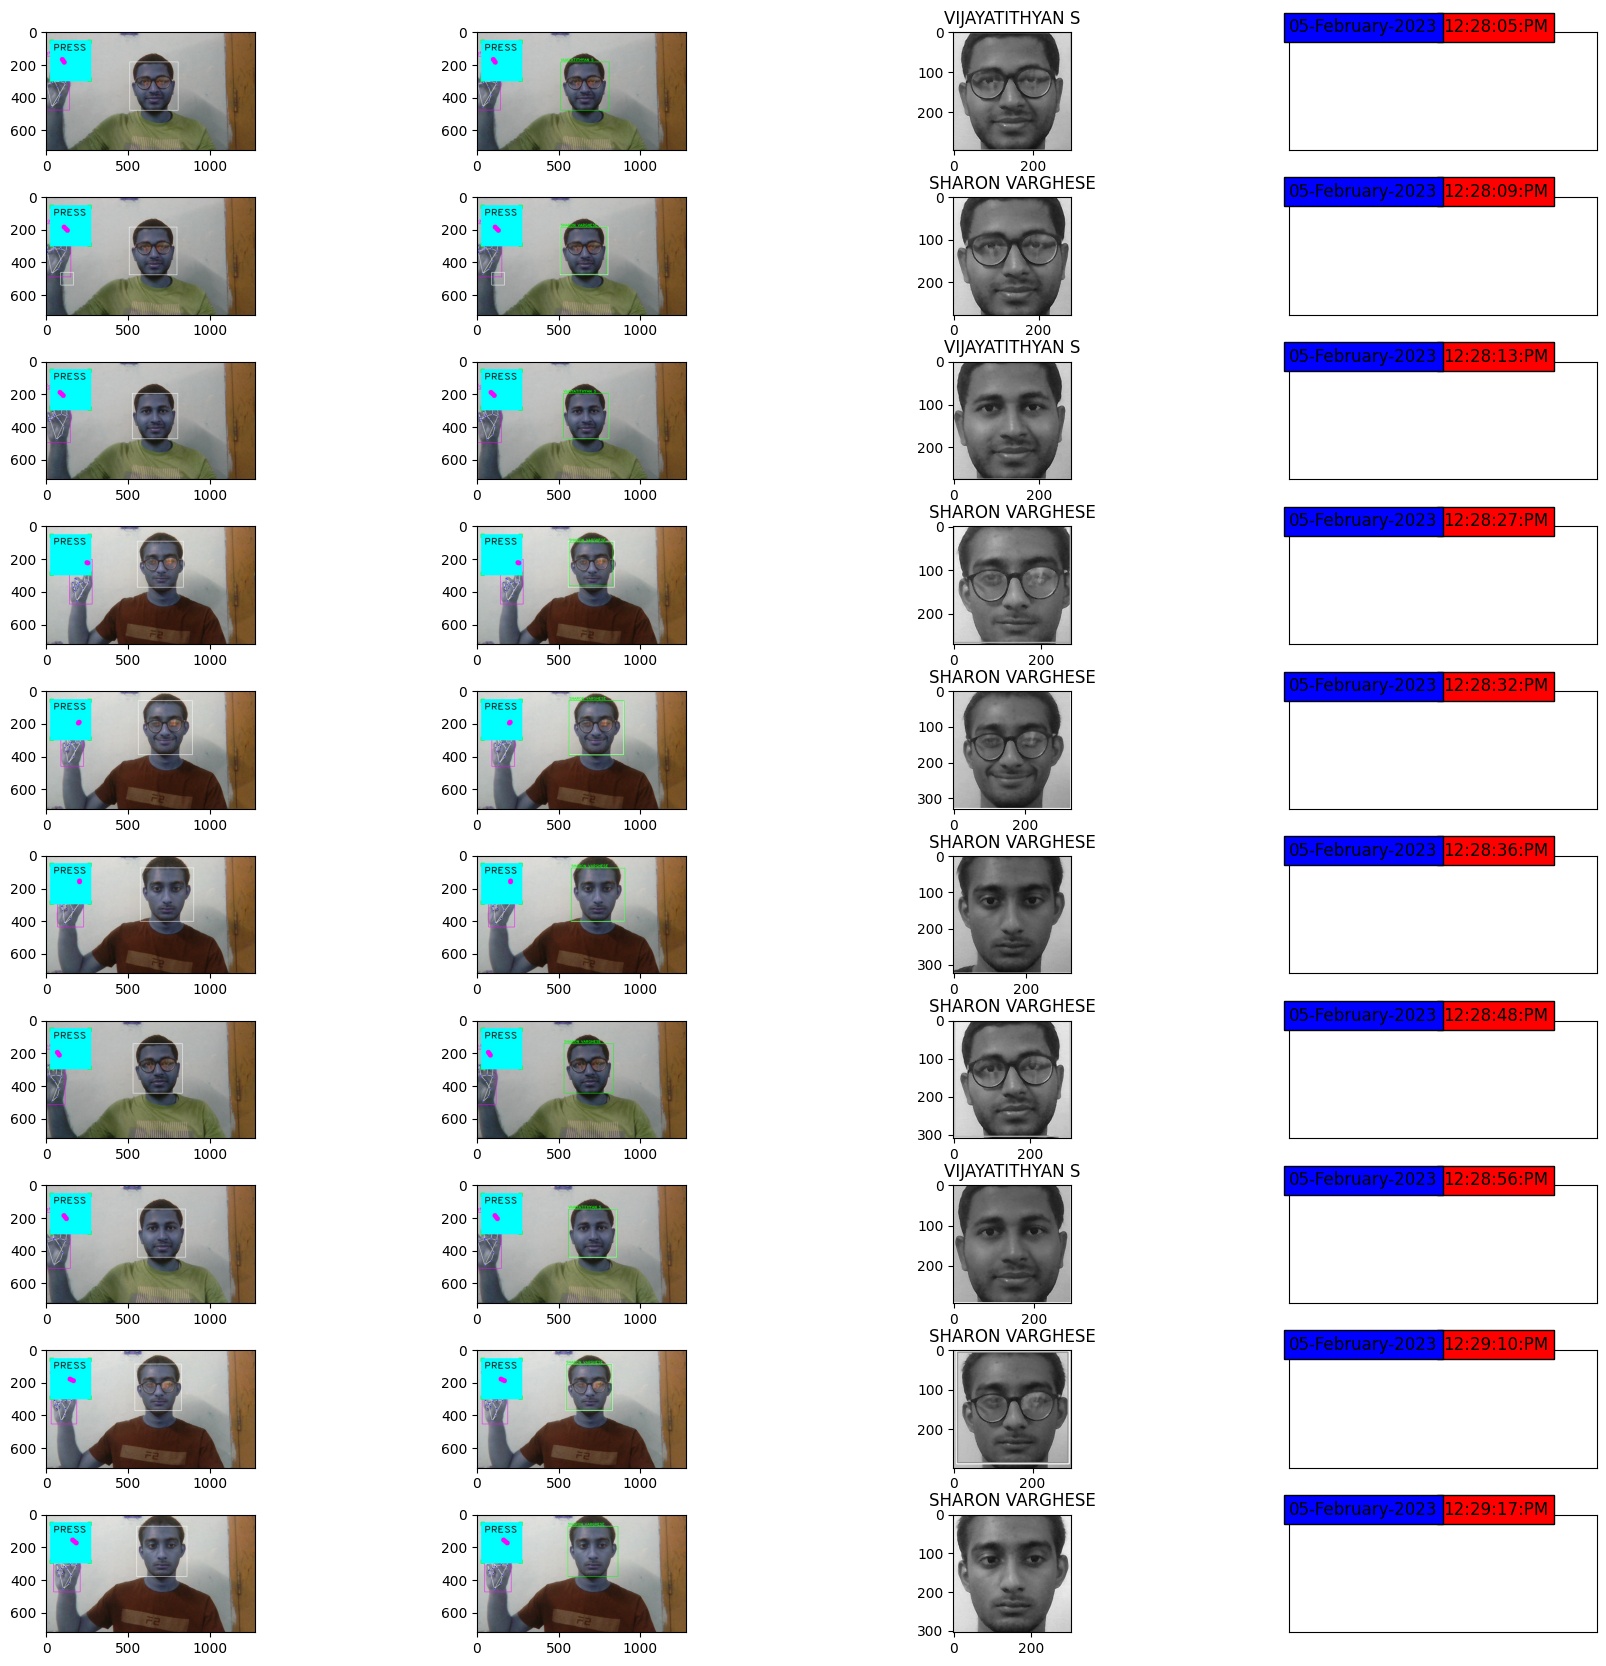

In [26]:
plt.figure(figsize=(20,20))
j=1
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

for i in range(0,len(input_images)):
    img=cv2.imread(input_images[i])
    detected_face=detect_face(img)
    plt.subplot(10,4,j)
    plt.imshow(detected_face,cmap='gray')
    j+=1
    predicted_img2,name = predict(detected_face)
    plt.subplot(10,4,j)
    plt.imshow(predicted_img2,cmap='gray')
    j+=1
    cropped_image,coordinates=crop_face(predicted_img2)
    plt.subplot(10,4,j)
    plt.imshow(cropped_image,cmap='gray')
    plt.title(name)
    j+=1
    plt.subplot(10,4,j)
    plt.plot()
    plt.xlim(0,10)
    plt.ylim(0,10)
    plt.xticks([])
    plt.yticks([])
    plt.text(5,10, df['time'][i], fontsize = 12, 
         bbox = dict(facecolor = 'red'))
    plt.text(0,10, df['date'][i], fontsize = 12, 
         bbox = dict(facecolor = 'blue'))
    j+=1
    